<a href="https://colab.research.google.com/github/kushiraj18/DATA-ANALYSIS-USING-PYTHON/blob/main/2203A52030_KUSHI_RAJ_KANCHU_DAUP_PROJECT_1__CSV_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/udemy_courses.csv')

In [ ]:
# Display first few rows
print("\nDataset preview:")
print(df.head())


Dataset preview:
   course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1       

In [ ]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Level

In [ ]:
# Identify categorical columns and encode them
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
# Identify feature and target columns
X = df.iloc[:, :-1]  # All columns except the last as features
y = df.iloc[:, -1]   # Last column as target

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# List of classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


In [ ]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.4783
              precision    recall  f1-score   support

           0       0.46      0.67      0.54       264
           1       0.50      0.04      0.07       113
           2       0.36      0.23      0.28       127
           3       0.55      0.61      0.58       232

    accuracy                           0.48       736
   macro avg       0.47      0.39      0.37       736
weighted avg       0.48      0.48      0.44       736


Decision Tree Accuracy: 0.4769
              precision    recall  f1-score   support

           0       0.50      0.45      0.48       264
           1       0.23      0.27      0.25       113
           2       0.43      0.46      0.44       127
           3       0.62      0.61      0.62       232

    accuracy                           0.48       736
   macro avg       0.45      0.45      0.45       736
weighted avg       0.49      0.48      0.48       736


Random Forest Accuracy: 0.6454
              precision    r

In [ ]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

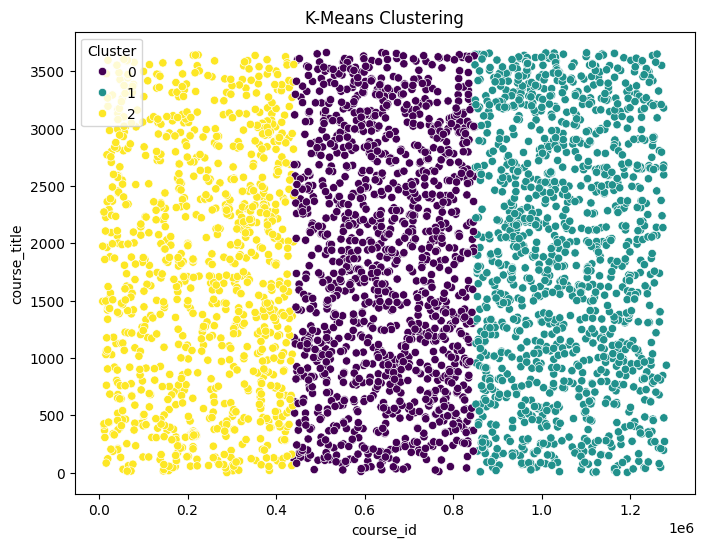

In [ ]:
# Plot Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=df['Cluster'], palette="viridis")
plt.title("K-Means Clustering")
plt.show()

In [ ]:
# Assuming the last column is the target variable
target_col = df.columns[-1]
target_dtype = df[target_col].dtype

if df[target_col].nunique() <= 10 and df[target_col].dtype in ['object', 'bool', 'int64']:
    print(f"The dataset is suitable for Classification as the target column '{target_col}' has {df[target_col].nunique()} unique values.")
else:
    print(f"The dataset is suitable for Regression as the target column '{target_col}' has continuous numerical values.")


The dataset is suitable for Regression as the target column 'Cluster' has continuous numerical values.


In [ ]:
# Visualizations and Statistical Analysis
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

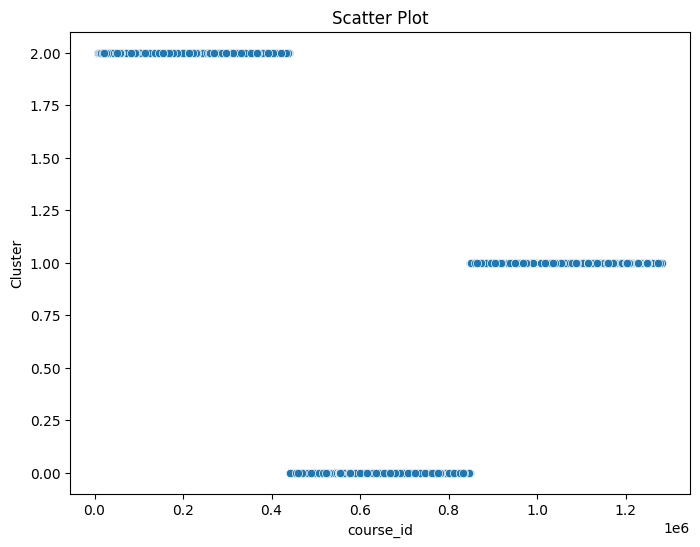

In [ ]:
# Scatter Plot
if len(numerical_columns) > 1:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[numerical_columns[0]], y=df[numerical_columns[-1]])
    plt.title('Scatter Plot')
    plt.xlabel(numerical_columns[0])
    plt.ylabel(numerical_columns[-1])
    plt.show()


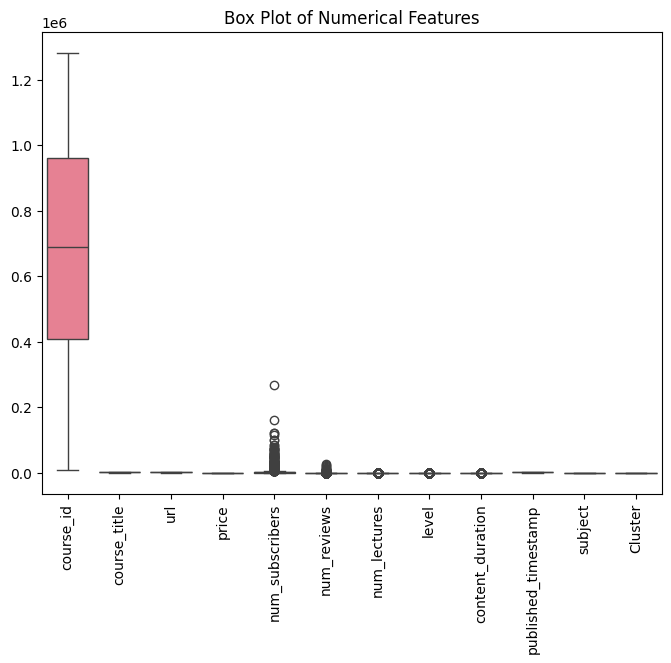

In [ ]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Compute Mean, Median, Mode, and Skewness
print("\nStatistical Summary:")
for col in numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Skewness: {df[col].skew()}")


Statistical Summary:

Column: course_id
Mean: 675971.9632952692
Median: 687917.0
Mode: 28295
Skewness: -0.15413192155166744

Column: course_title
Mean: 1829.5353452963568
Median: 1829.5
Mode: 136
Skewness: 0.001865555872888731

Column: url
Mean: 1835.3493746601414
Median: 1835.5
Mode: 601
Skewness: 0.000727204112770029

Column: price
Mean: 66.0494834148994
Median: 45.0
Mode: 20
Skewness: 1.1591408010078954

Column: num_subscribers
Mean: 3197.150625339859
Median: 911.5
Mode: 0
Skewness: 11.541417343075091

Column: num_reviews
Mean: 156.25910821098424
Median: 18.0
Mode: 0
Skewness: 17.81655366407283

Column: num_lectures
Mean: 40.108754758020666
Median: 25.0
Mode: 12
Skewness: 4.873676894932109

Column: level
Mean: 0.7202283849918434
Median: 0.0
Mode: 0
Skewness: 1.3618814211582226

Column: content_duration
Mean: 4.094516947616459
Median: 2.0
Mode: 1.0
Skewness: 5.428022319015977

Column: published_timestamp
Mean: 1835.9192495921698
Median: 1836.5
Mode: 50
Skewness: -0.00078191867026407


Statistical Summary:

Column: course_id
Mean: 675971.9632952692
Median: 687917.0
Mode: 28295
Variance: 117836459657.84933
Standard Deviation: 343273.1560402726
Range: 1273740
Skewness: -0.15413192155166744
Kurtosis: -0.9961744929500185


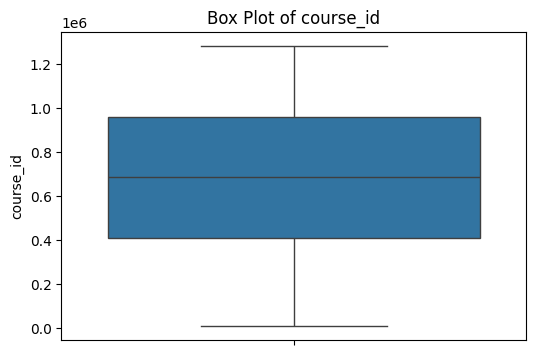

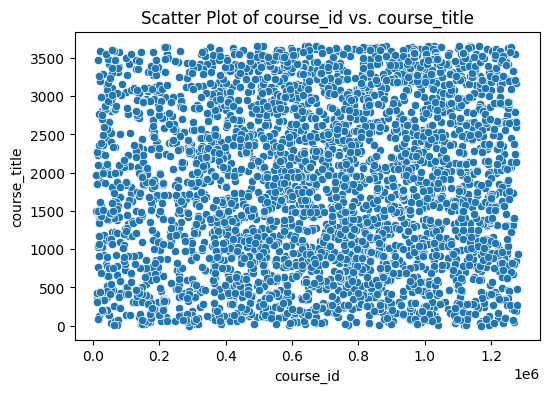


Column: course_title
Mean: 1829.5353452963568
Median: 1829.5
Mode: 136
Variance: 1118573.4443582026
Standard Deviation: 1057.6263254846688
Range: 3662
Skewness: 0.001865555872888731
Kurtosis: -1.199957572425691


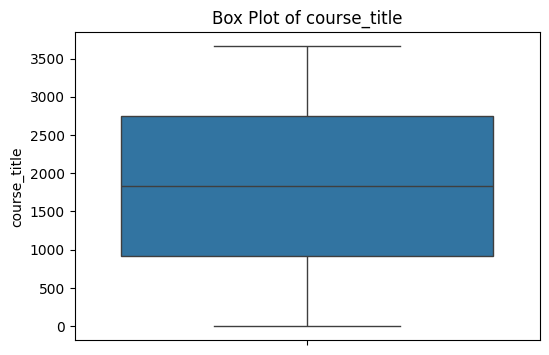

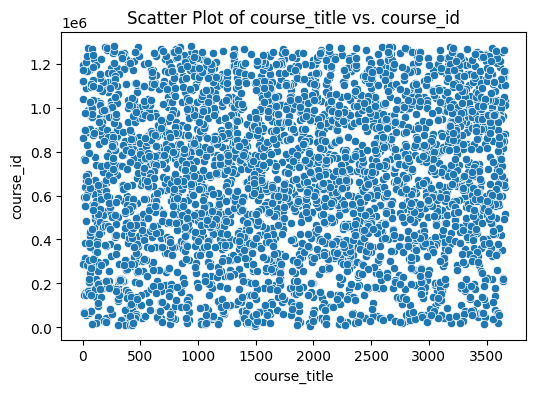


Column: url
Mean: 1835.3493746601414
Median: 1835.5
Mode: 601
Variance: 1123885.0786112503
Standard Deviation: 1060.1344625146614
Range: 3671
Skewness: 0.000727204112770029
Kurtosis: -1.2002074039114732


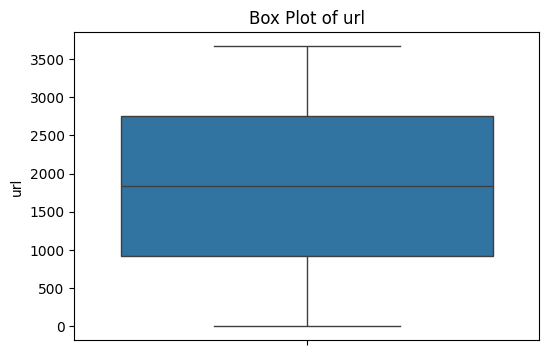

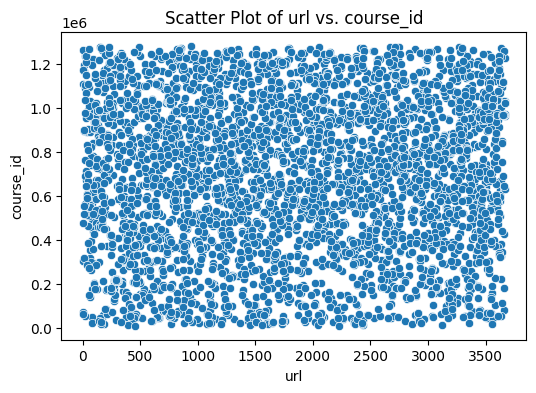


Column: price
Mean: 66.0494834148994
Median: 45.0
Mode: 20
Variance: 3721.702201256114
Standard Deviation: 61.00575547648037
Range: 200
Skewness: 1.1591408010078954
Kurtosis: 0.097364805639089


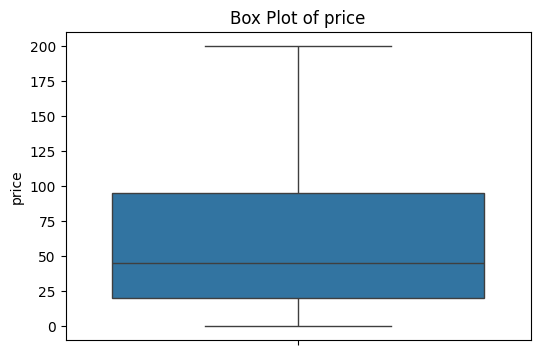

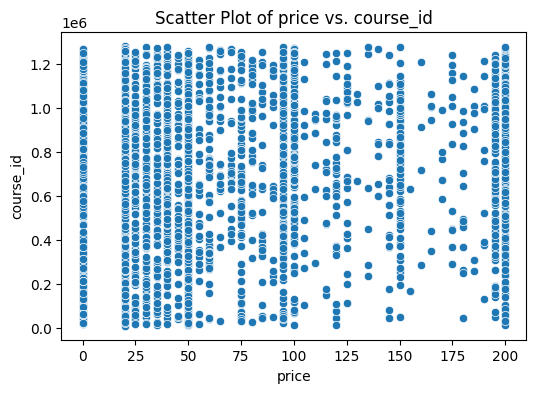


Column: num_subscribers
Mean: 3197.150625339859
Median: 911.5
Mode: 0
Variance: 90328240.14809719
Standard Deviation: 9504.117010438013
Range: 268923
Skewness: 11.541417343075091
Kurtosis: 222.1600877403487


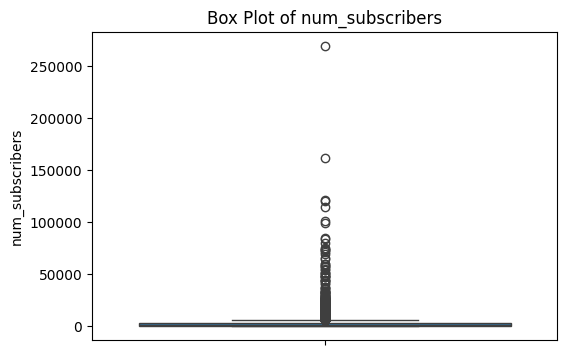

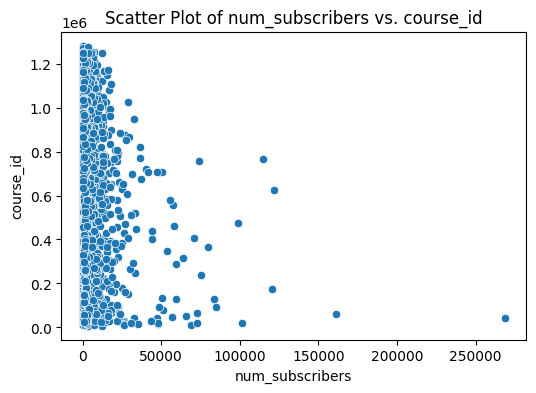


Column: num_reviews
Mean: 156.25910821098424
Median: 18.0
Mode: 0
Variance: 875070.5270791056
Standard Deviation: 935.452044243373
Range: 27445
Skewness: 17.81655366407283
Kurtosis: 399.14421946945043


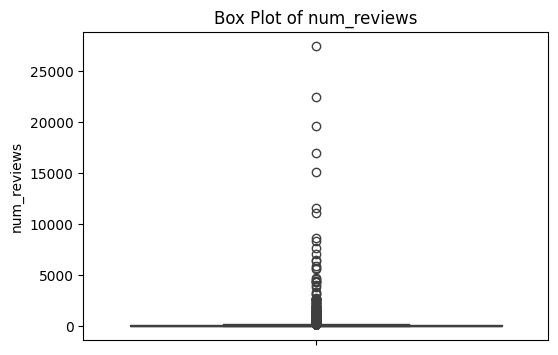

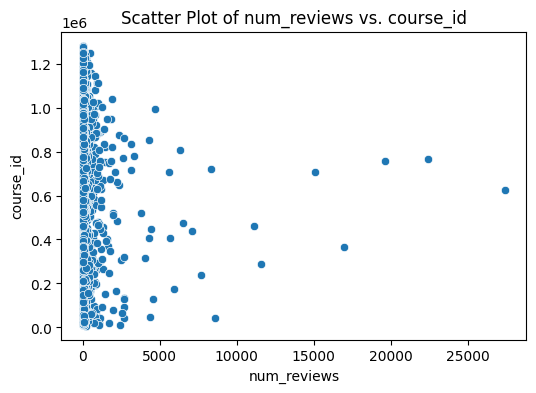


Column: num_lectures
Mean: 40.108754758020666
Median: 25.0
Mode: 12
Variance: 2538.481506145448
Standard Deviation: 50.38334552355022
Range: 779
Skewness: 4.873676894932109
Kurtosis: 36.79867653358046


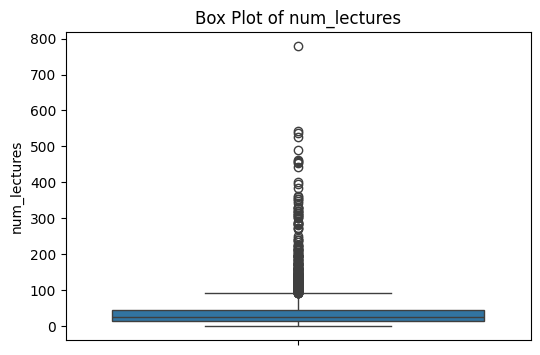

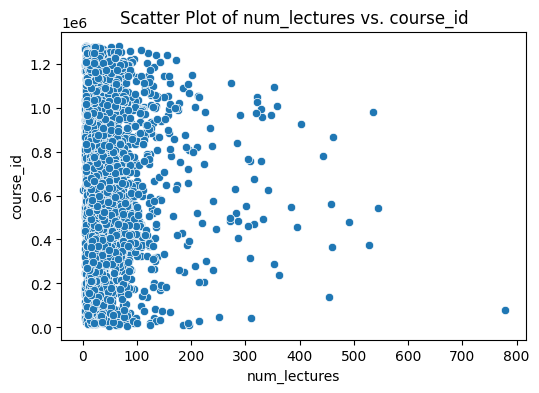


Column: level
Mean: 0.7202283849918434
Median: 0.0
Mode: 0
Variance: 0.9200747914485754
Standard Deviation: 0.959205291607889
Range: 3
Skewness: 1.3618814211582226
Kurtosis: 0.8765973617587464


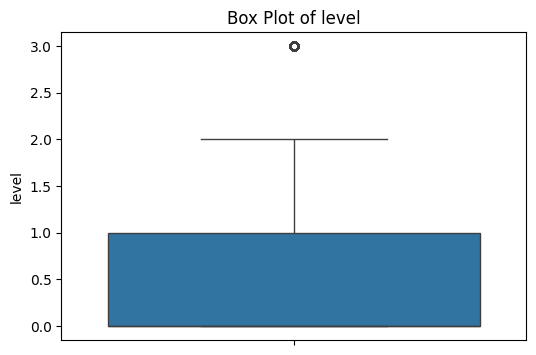

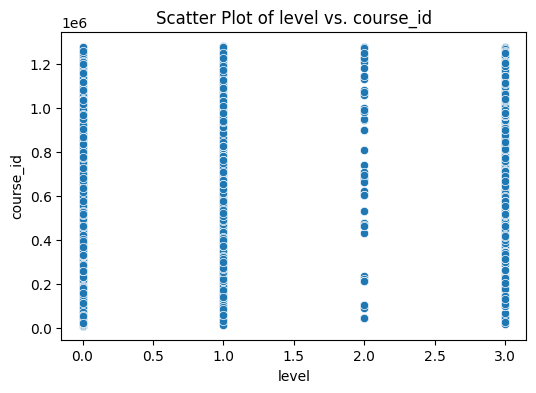


Column: content_duration
Mean: 4.094516947616459
Median: 2.0
Mode: 1.0
Variance: 36.64898376774591
Standard Deviation: 6.053840414790095
Range: 78.5
Skewness: 5.428022319015977
Kurtosis: 43.093064156729696


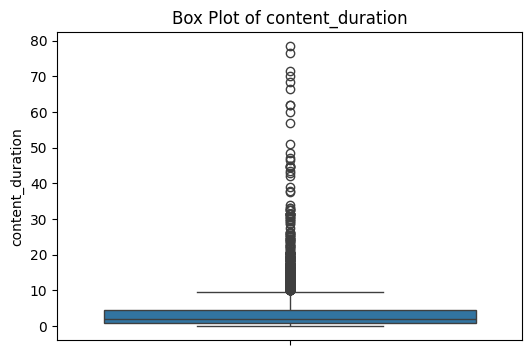

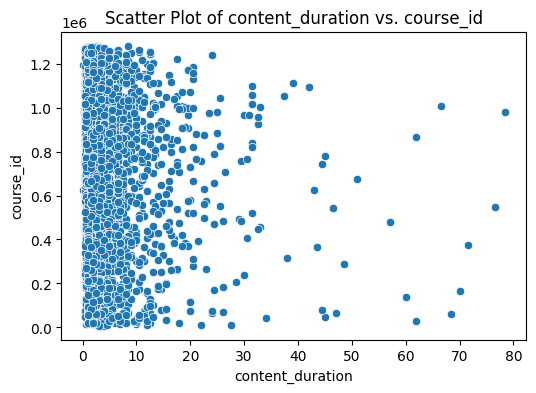


Column: published_timestamp
Mean: 1835.9192495921698
Median: 1836.5
Mode: 50
Variance: 1125405.8001134442
Standard Deviation: 1060.8514505402932
Range: 3671
Skewness: -0.0007819186702640799
Kurtosis: -1.2008013580748083


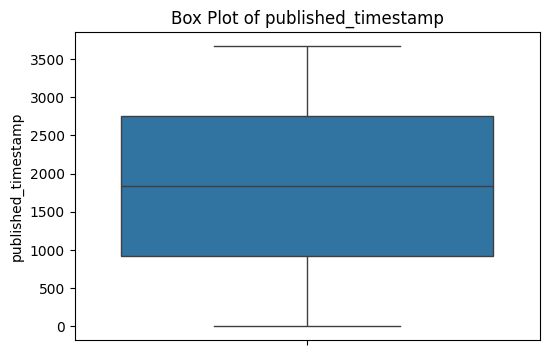

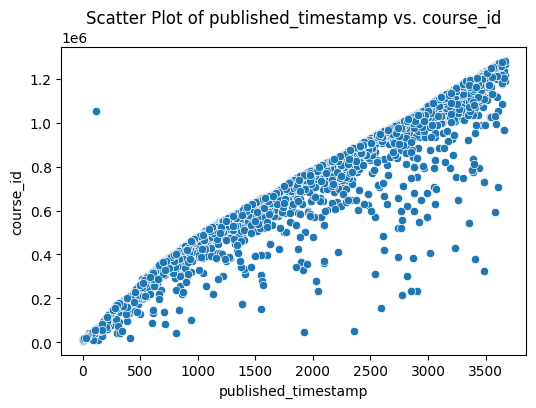


Column: subject
Mean: 1.5125067971723762
Median: 2.0
Mode: 3
Variance: 1.5526039399863383
Standard Deviation: 1.2460352884193682
Range: 3
Skewness: -0.02640188940983966
Kurtosis: -1.6227942886487572


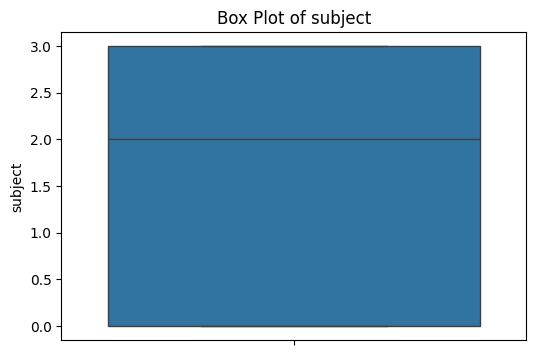

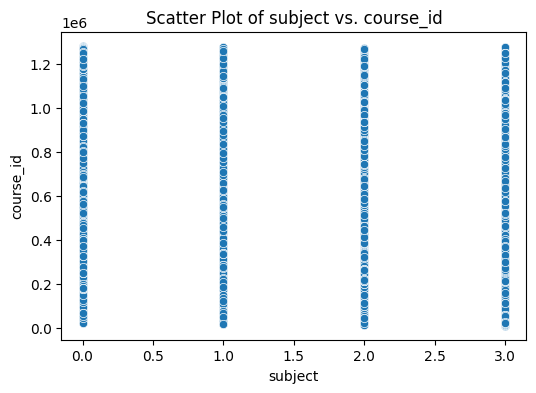


Column: Cluster
Mean: 0.898042414355628
Median: 1.0
Mode: 0
Variance: 0.6387723430468776
Standard Deviation: 0.7992323460964762
Range: 2
Skewness: 0.18512088918442665
Kurtosis: -1.4123668033896633


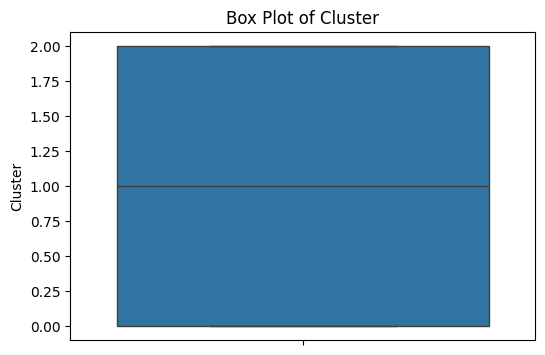

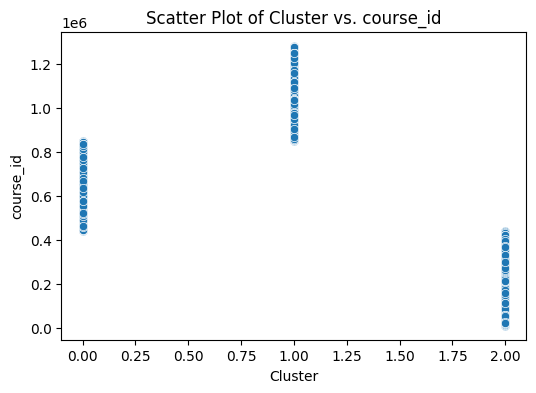

In [ ]:
# prompt: # Compute Mean, Median, Mode, and Skewness
# print("\nStatistical Summary:")
# for col in numerical_columns:
#     print(f"\nColumn: {col}")
#     print(f"Mean: {df[col].mean()}")
#     print(f"Median: {df[col].median()}")
#     print(f"Mode: {df[col].mode()[0]}")
#     print(f"Skewness: {df[col].skew()}")
# like this generate a code for
# mean ,median,mode,varaiance,standard deviation,range ,boxplot,scatter lpot sknewness ,kurtosis code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code) ...

# Compute Mean, Median, Mode, Variance, Std. Dev, Range, Skewness, Kurtosis
print("\nStatistical Summary:")
for col in numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Variance: {df[col].var()}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Range: {df[col].max() - df[col].min()}")
    print(f"Skewness: {df[col].skew()}")
    print(f"Kurtosis: {df[col].kurt()}")

    # Box Plot (individual for each column)
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])  # Use y for vertical boxplot
    plt.title(f'Box Plot of {col}')
    plt.show()

    # Scatter plot (if there's another numerical column to compare with)
    if len(numerical_columns) > 1:
      other_col = [c for c in numerical_columns if c != col]
      if other_col:
          plt.figure(figsize=(6, 4))
          sns.scatterplot(x=df[col], y=df[other_col[0]])
          plt.title(f'Scatter Plot of {col} vs. {other_col[0]}')
          plt.show()
